In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:41:38 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'NEO'

In [5]:
def datetime_neo_supply_curve(num_weeks):
    supply = [
        # Total distribution,
    ]
    start_date = datetime.date(2014, 2, 15)
    max_supply = 100 * 1e6
    y = 50 * 1e6
    yearly_distribution = 15 * 1e6
    supply.append([y])
    for week in range(num_weeks):
        if week == int(3*52):
            y += yearly_distribution
        elif ((week % (3*52) == 0) &
              (week >= int(6*52))):
            y += yearly_distribution
        supply.append([min((y, max_supply))])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='W',
        periods=len(df)
    )
    return df

,total_supply,total_supply_pct,date
0,50000000.0,50.0,2014-02-16
1,50000000.0,50.0,2014-02-23
2,50000000.0,50.0,2014-03-02
3,50000000.0,50.0,2014-03-09
4,50000000.0,50.0,2014-03-16


,total_supply,total_supply_pct,date
1196,100000000.0,100.0,2037-01-18
1197,100000000.0,100.0,2037-01-25
1198,100000000.0,100.0,2037-02-01
1199,100000000.0,100.0,2037-02-08
1200,100000000.0,100.0,2037-02-15


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

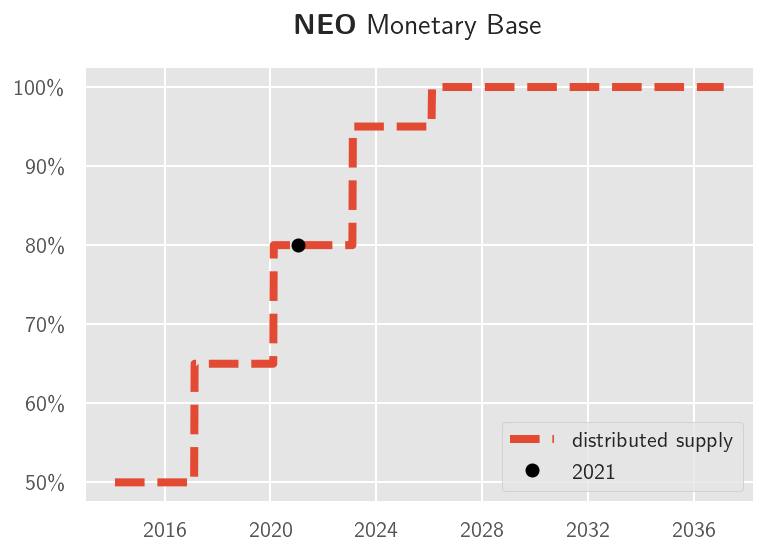

In [6]:
supply = datetime_neo_supply_curve(num_weeks=1200)

display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'NEO',
    fmt='--',
    out_name='NEO',
);

In [7]:
def neo_gas_block_supply_curve(max_size=None):
    out = [
        # Block num,
        # Total supply,
    ]
    block_reward = 8
    inflation_change_amount=-1
    inflation_change_blocks=int(2*1e6)
    max_supply = 100 * 1e6
    
    num_changes = 0
    y = 0
    block = 0
    max_blocks = 78840000    # Breakpoint 50 years from now
    
    # Mex size to prevent memory overflows
    if max_size is not None:
        block_freq = max_blocks / _max_size
    else:
        block_freq = 1
        
    for block in tqdm_notebook(range(max_blocks)):

        if ((block % inflation_change_blocks == 0)
            & (block_reward > 1)):
            num_changes += 1
            block_reward += inflation_change_amount
            print(
                f'Inflation change #{num_changes}, '
                f'block reward = {block_reward}'
            )
        y += block_reward
        if block % block_freq == 0:
            out.append([block, min((y, max_supply))])

    return out, block_freq

In [8]:
start_date = datetime.date(2017, 7, 7)
block_time = datetime.timedelta(seconds=20)

_max_size = 10000
block_supply, _block_freq = neo_gas_block_supply_curve(_max_size)

gas_supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time*_block_freq,
    block_supply=block_supply,
)

<ipython-input-1-3186c64fcb0e>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for block in tqdm_notebook(range(max_blocks)):


  0%|          | 0/78840000 [00:00<?, ?it/s]

Inflation change #1, block reward = 7
Inflation change #2, block reward = 6
Inflation change #3, block reward = 5
Inflation change #4, block reward = 4
Inflation change #5, block reward = 3
Inflation change #6, block reward = 2
Inflation change #7, block reward = 1


,block,total_supply,total_supply_pct,date
0,0,7.0,0.000007,2017-07-07 00:00:00
1,7884,55195.0,0.055195,2017-07-08 19:48:00
2,15768,110383.0,0.110383,2017-07-10 15:36:00
3,23652,165571.0,0.165571,2017-07-12 11:24:00
4,31536,220759.0,0.220759,2017-07-14 07:12:00


,block,total_supply,total_supply_pct,date
9995,78800580,100000000.0,100.0,2067-06-15 21:00:00
9996,78808464,100000000.0,100.0,2067-06-17 16:48:00
9997,78816348,100000000.0,100.0,2067-06-19 12:36:00
9998,78824232,100000000.0,100.0,2067-06-21 08:24:00
9999,78832116,100000000.0,100.0,2067-06-23 04:12:00


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

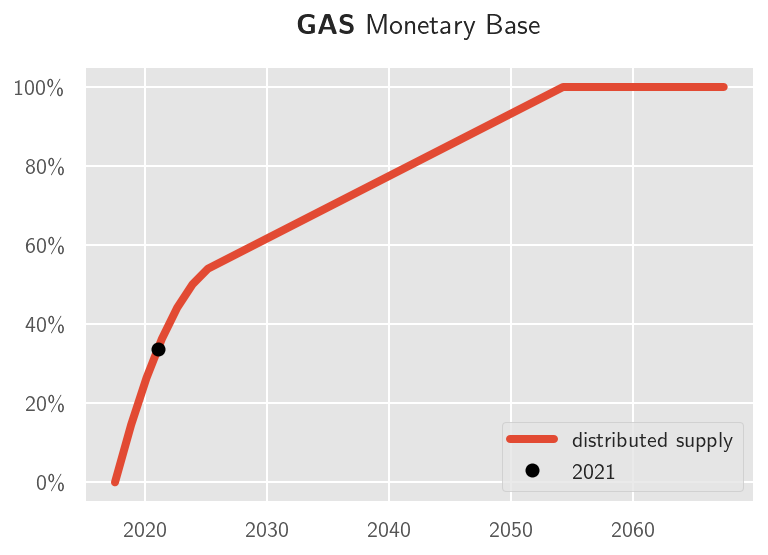

In [9]:
display(gas_supply.head())
display(gas_supply.tail())

cmb.plot_supply_curve(
    gas_supply,
    'GAS',
    fmt='-',
    out_name='GAS',
);

## Standardize Time Series

In [10]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 1201 lines to file ../output-data/NEO_weekly.csv


,coin,total_supply,total_supply_pct,date
0,NEO,50000000.0,50.0,2014-02-01
1,NEO,50000000.0,50.0,2014-02-01
2,NEO,50000000.0,50.0,2014-03-01
3,NEO,50000000.0,50.0,2014-03-01
4,NEO,50000000.0,50.0,2014-03-01


,coin,total_supply,total_supply_pct,date
1196,NEO,100000000.0,100.0,2037-01-01
1197,NEO,100000000.0,100.0,2037-01-01
1198,NEO,100000000.0,100.0,2037-02-01
1199,NEO,100000000.0,100.0,2037-02-01
1200,NEO,100000000.0,100.0,2037-02-01


In [11]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 277 lines to file ../output-data/NEO_monthly.csv


,coin,total_supply,total_supply_pct,date
0,NEO,50000000.0,50.0,2014-02-01
1,NEO,50000000.0,50.0,2014-03-01
2,NEO,50000000.0,50.0,2014-04-01
3,NEO,50000000.0,50.0,2014-05-01
4,NEO,50000000.0,50.0,2014-06-01


,coin,total_supply,total_supply_pct,date
272,NEO,100000000.0,100.0,2036-10-01
273,NEO,100000000.0,100.0,2036-11-01
274,NEO,100000000.0,100.0,2036-12-01
275,NEO,100000000.0,100.0,2037-01-01
276,NEO,100000000.0,100.0,2037-02-01


In [12]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 24 lines to file ../output-data/NEO_yearly.csv


,coin,total_supply,total_supply_pct,date
0,NEO,50000000.0,50.0,2014-02-01
1,NEO,50000000.0,50.0,2015-01-01
2,NEO,50000000.0,50.0,2016-01-01
3,NEO,50000000.0,50.0,2017-01-01
4,NEO,65000000.0,65.0,2018-01-01


,coin,total_supply,total_supply_pct,date
19,NEO,100000000.0,100.0,2033-01-01
20,NEO,100000000.0,100.0,2034-01-01
21,NEO,100000000.0,100.0,2035-01-01
22,NEO,100000000.0,100.0,2036-01-01
23,NEO,100000000.0,100.0,2037-01-01


In [13]:
gas_weekly_supply = cmb.transform_supply(gas_supply, 'GAS', freq='weekly')

display(gas_weekly_supply.head())
display(gas_weekly_supply.tail())

Wrote 2608 lines to file ../output-data/GAS_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,GAS,0,7.0,0.000007,2017-07-01
1,GAS,15768,110383.0,0.110383,2017-07-01
2,GAS,47304,331135.0,0.331135,2017-07-01
3,GAS,78840,551887.0,0.551887,2017-07-01
4,GAS,110376,772639.0,0.772639,2017-08-01


,coin,block,total_supply,total_supply_pct,date
2603,GAS,78698088,100000000.0,100.0,2067-05-01
2604,GAS,78729624,100000000.0,100.0,2067-05-01
2605,GAS,78761160,100000000.0,100.0,2067-06-01
2606,GAS,78792696,100000000.0,100.0,2067-06-01
2607,GAS,78824232,100000000.0,100.0,2067-06-01


In [14]:
gas_monthly_supply = cmb.transform_supply(gas_supply, 'GAS', freq='monthly')

display(gas_monthly_supply.head())
display(gas_monthly_supply.tail())

Wrote 600 lines to file ../output-data/GAS_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,GAS,0,7.0,0.000007,2017-07-01
1,GAS,110376,772639.0,0.772639,2017-08-01
2,GAS,244404,1710835.0,1.710835,2017-09-01
3,GAS,378432,2649031.0,2.649031,2017-10-01
4,GAS,512460,3587227.0,3.587227,2017-11-01


,coin,block,total_supply,total_supply_pct,date
595,GAS,78225048,100000000.0,100.0,2067-02-01
596,GAS,78343308,100000000.0,100.0,2067-03-01
597,GAS,78477336,100000000.0,100.0,2067-04-01
598,GAS,78603480,100000000.0,100.0,2067-05-01
599,GAS,78737508,100000000.0,100.0,2067-06-01


In [15]:
gas_yearly_supply = cmb.transform_supply(gas_supply, 'GAS', freq='yearly')

display(gas_yearly_supply.head())
display(gas_yearly_supply.tail())

Wrote 51 lines to file ../output-data/GAS_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,GAS,0,7.0,0.000007,2017-07-01
1,GAS,772632,5408431.0,5.408431,2018-01-01
2,GAS,2349432,16096598.0,16.096598,2019-01-01
3,GAS,3926232,25557398.0,25.557398,2020-01-01
4,GAS,5510916,33554585.0,33.554585,2021-01-01


,coin,block,total_supply,total_supply_pct,date
46,GAS,71775936,100000000.0,100.0,2063-01-01
47,GAS,73352736,100000000.0,100.0,2064-01-01
48,GAS,74937420,100000000.0,100.0,2065-01-01
49,GAS,76514220,100000000.0,100.0,2066-01-01
50,GAS,78091020,100000000.0,100.0,2067-01-01
